Perform Data Quality Checks and various Profiling Functions over the UCI Adult Dataset.

Link for the Dataset:

http://archive.ics.uci.edu/dataset/2/adult


## The Code

### Imports

In [1]:
!pip install ucimlrepo

  Using cached ucimlrepo-0.0.3-py3-none-any.whl.metadata (5.2 kB)
Using cached ucimlrepo-0.0.3-py3-none-any.whl (7.0 kB)


In [2]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset into a DataFrame

In [3]:
# Load the dataset into a DataFrame
def load_dataset():
    # TODO: Load the dataset from using ucimlrepo module as provided in the dataset link
    # Define the dataset as a Pandas DataFrame
    # fetch dataset
    adult = fetch_ucirepo(id=2)

    # data (as pandas dataframes)
    X = adult.data.features
    y = adult.data.targets

    df = pd.concat([X, y], axis=1)

    return df

### Function for applying DQM Checks

In [4]:
def data_quality_checks(df):
    # Handling missing values
    missing_values = df.isnull().sum()
    print(f"Missing Values:\n{missing_values}")
    print("-"*50)

    # Check for duplicates
    print(f"\nDuplicate Rows:{ df.duplicated().sum()}")
    print("-"*50)

    # Check for unique values in categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    print("\nUnique Values in Categorical Columns:")
    for col in categorical_columns:
        print(f"{col}: {df[col].nunique()}")
    print("-"*50)
    
    # Check for outliers using z-score
    numerical_columns = df.select_dtypes(exclude=["object"]).columns
    z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())
    outliers = (z_scores > 3).any(axis=1)
    print("\nOutliers Detected by Z-Score:")
    print(df[outliers].shape[0])    
    print("-"*50)

### Applying profiling

In [5]:
def profiling_visualization(df):
    # Display basic information about the dataset
    print("\nBasic Information about the Dataset:")
    df.info()
    print("-"*50)

    # Descriptive statistics
    print("\nDescriptive Statistics:")
    print(df.describe(include='all'))
    print("-"*50)

    # Categorical feature profiling
    print("\nCategorical Feature Profiling:")
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        # take top 16 values only and plot them in a bar chart
        plt.title(f"{col} Distribution", fontdict={'fontsize': 20})
        df[col].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')
        plt.xticks(rotation=90)
        plt.show()
    print("-"*50)

    # Numerical feature profiling
    print("\nNumerical Feature Profiling:")
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_columns:
        fig , ax = plt.subplots(1,2, figsize=(13,5))
        plt.suptitle(f"{col} Distribution", fontsize= 20)
        sns.histplot(df[col], ax=ax[0])
        sns.boxplot(df[col], ax=ax[1], orient='h')
        plt.show()

### Main function to display recommendation

In [6]:
def main():
    # Load the dataset
    df = load_dataset()

    # Data Quality Checks
    data_quality_checks(df)

    # Profiling Visualization
    profiling_visualization(df)

Missing Values:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
--------------------------------------------------

Duplicate Rows:29
--------------------------------------------------

Unique Values in Categorical Columns:
workclass: 9
education: 16
marital-status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
native-country: 42
income: 4
--------------------------------------------------

Outliers Detected by Z-Score:
4125
--------------------------------------------------

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          -----------

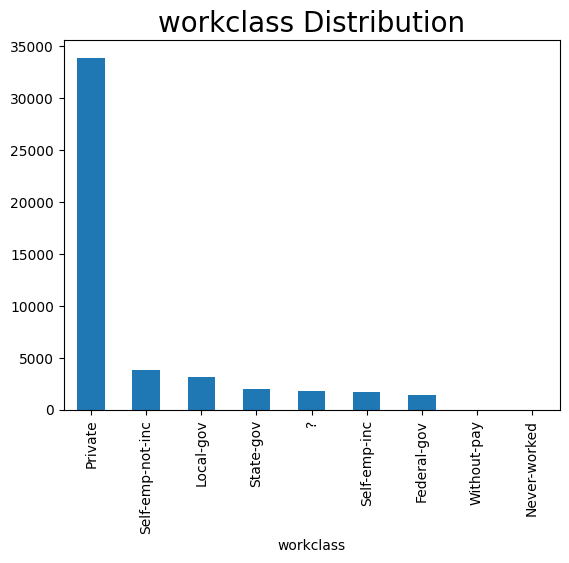

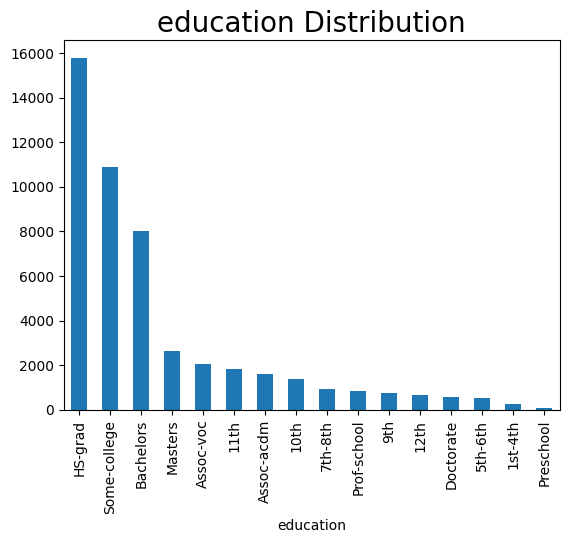

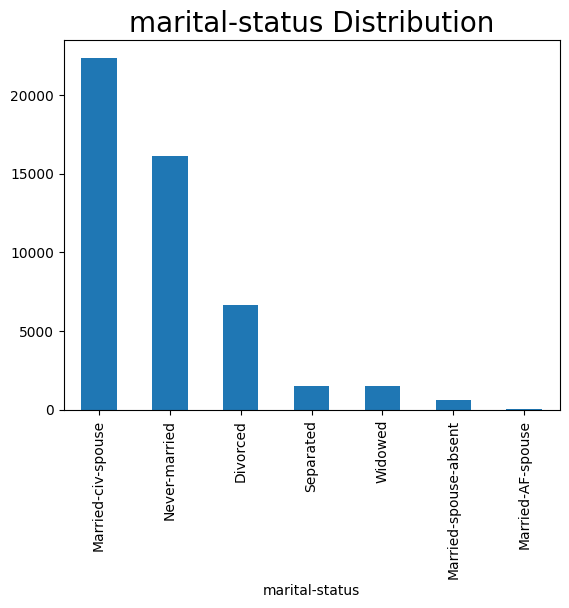

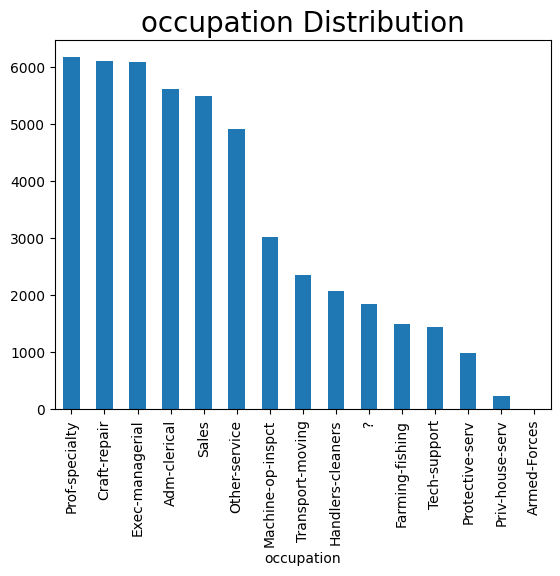

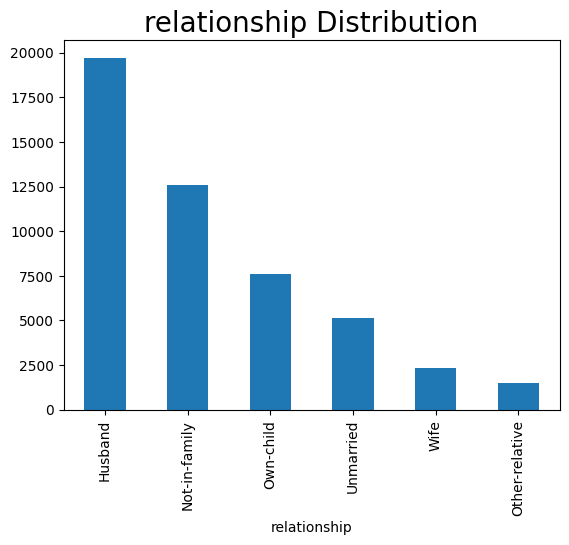

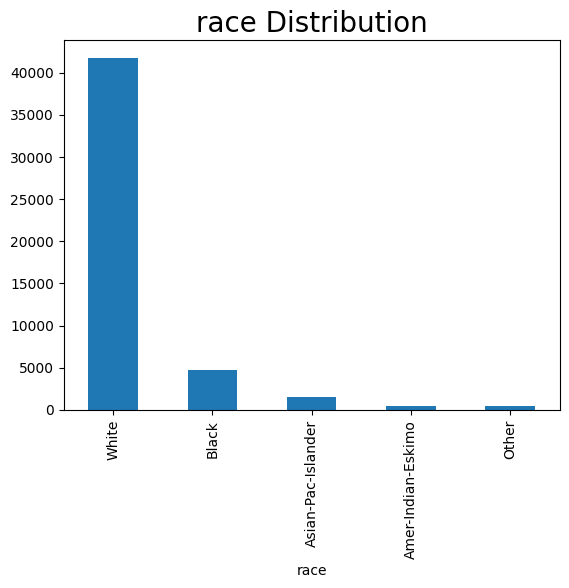

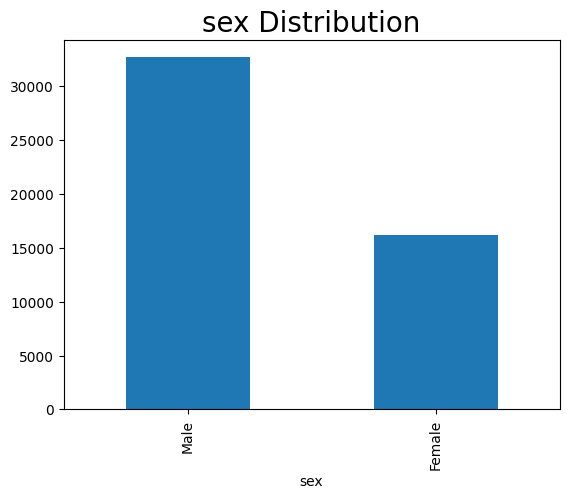

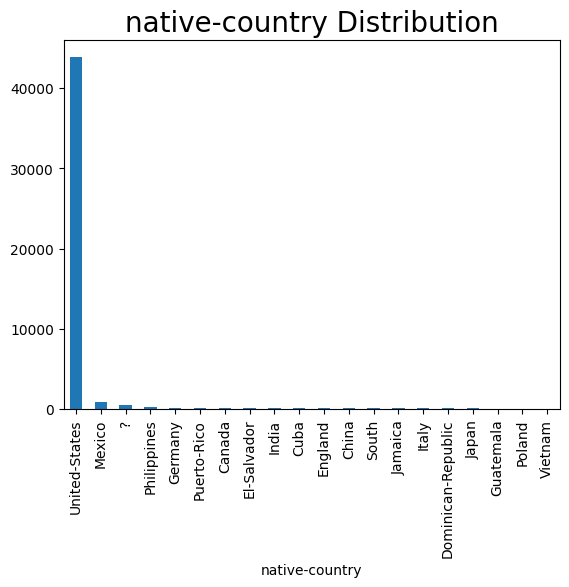

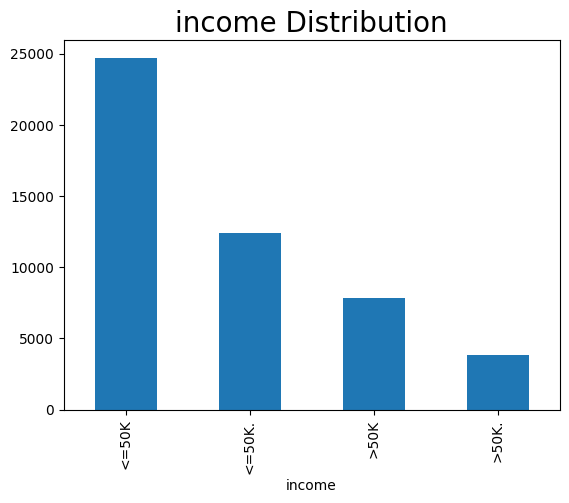

--------------------------------------------------

Numerical Feature Profiling:


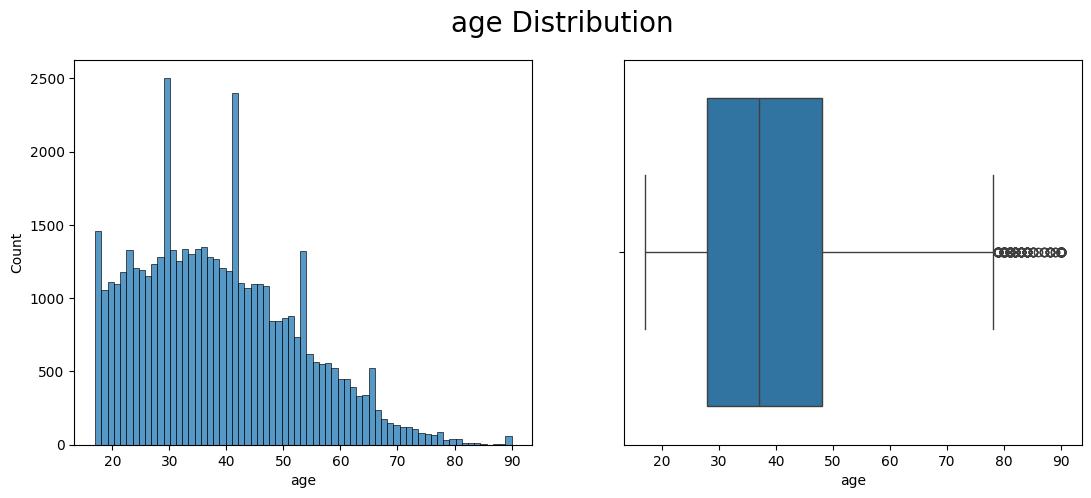

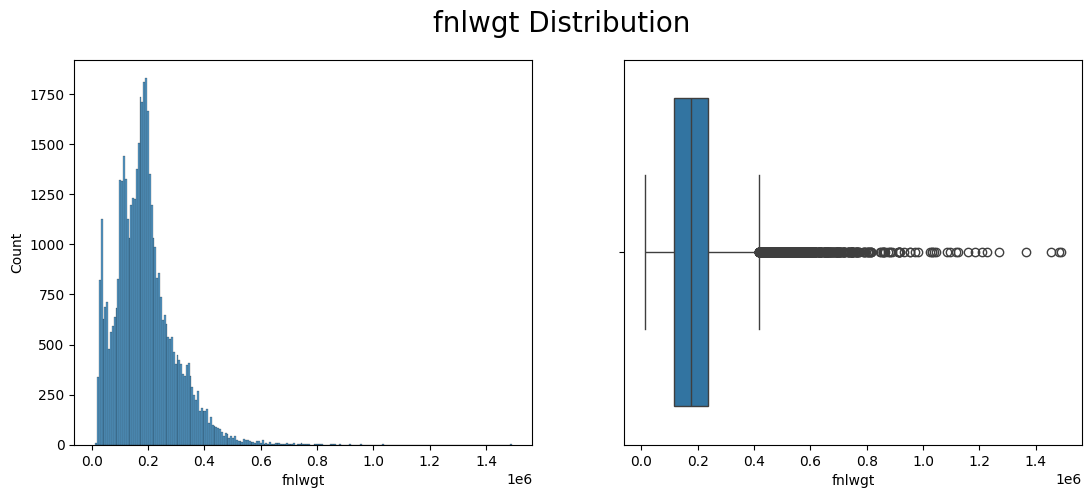

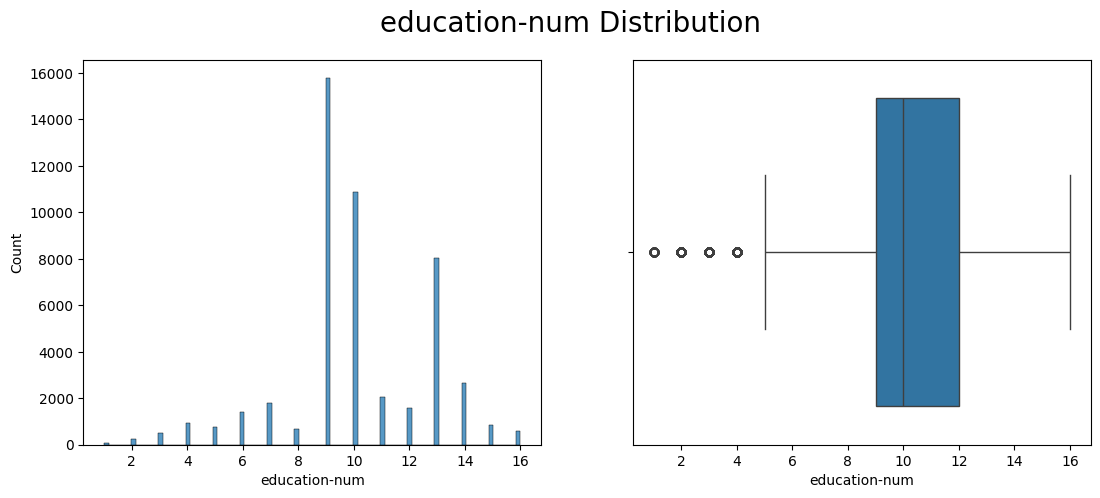

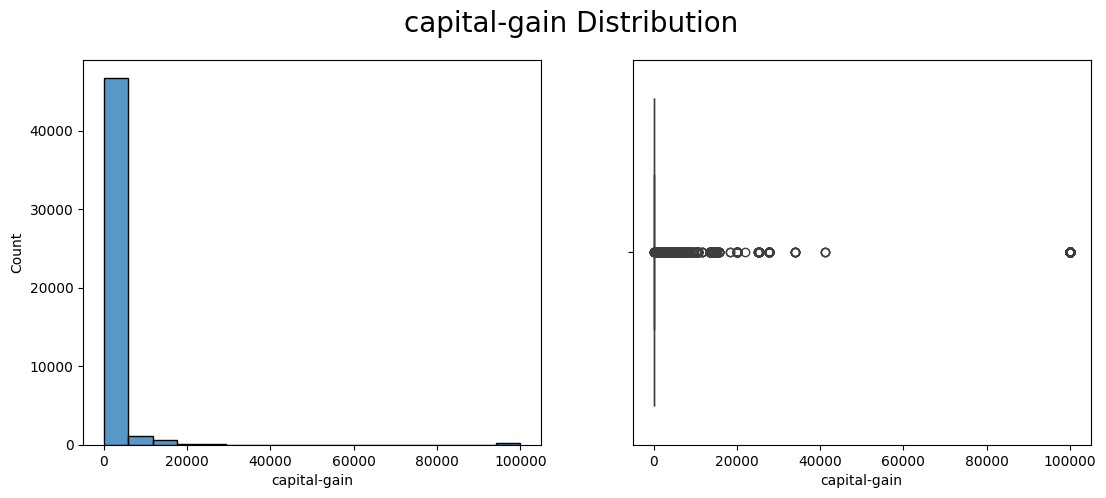

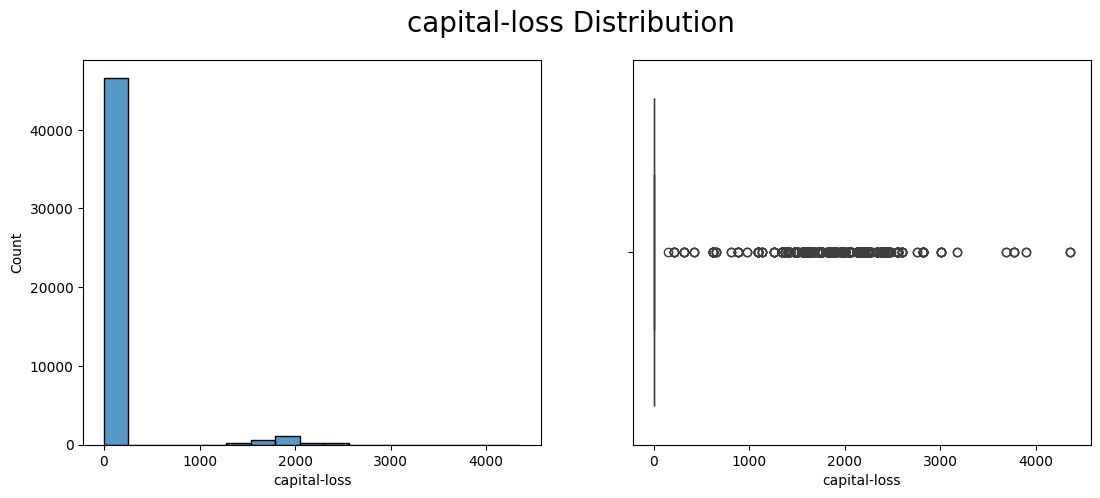

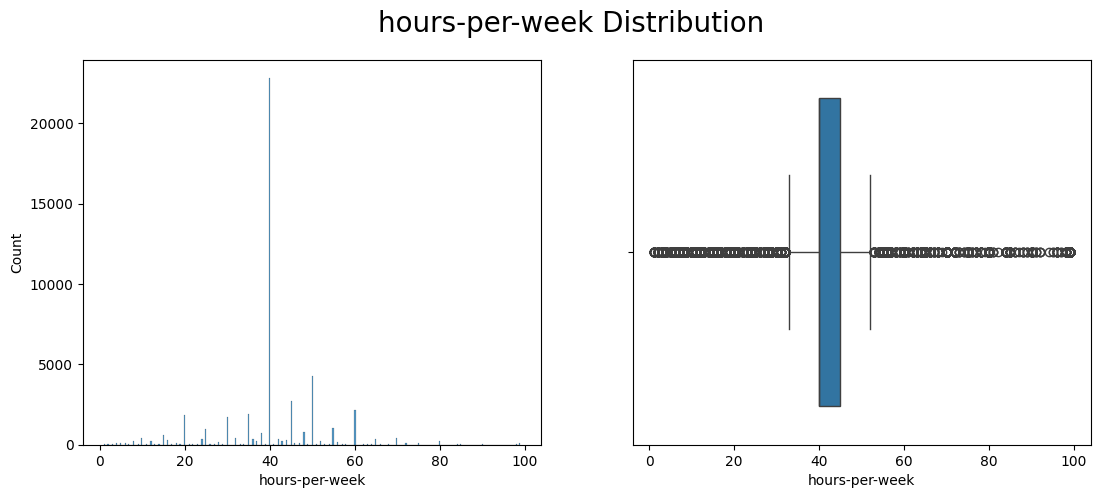

In [7]:
if __name__ == "__main__":
    main()